In [1]:
# Import packages
import numpy as np
import pandas as pd
from fastai.vision.all import *
from sklearn.model_selection import StratifiedKFold

C:\Users\shoyr\anaconda3\envs\fastai_env\lib\site-packages\torch\cuda\__init__.py:80: UserWarning: CUDA initialization: CUDA driver initialization failed, you might not have a CUDA gpu. (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:112.)
  return torch._C._cuda_getDeviceCount() > 0


In [2]:
# Import image labels
df = pd.read_csv('images/labels.csv')
df.head()

,files,label_specific,label_general,source
0,IMG_3788.JPEG,sweetclem,citrus,self
1,IMG_3789.JPEG,sweetclem,citrus,self
2,IMG_3790.JPEG,sweetclem,citrus,self
3,IMG_3791.JPEG,sweetclem,citrus,self
4,IMG_3792.JPEG,sweetclem,citrus,self


In [3]:
df['labels'] = df[['label_specific','label_general']].apply(
    lambda x: ' '.join(x.dropna().astype(str)),
    axis=1
)

In [4]:
# Setup image transforms
tfms = aug_transforms(size=224,flip_vert=True, max_rotate=25, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [5]:
'''skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=24)
conv_nets = [(resnet34,'resnet34'), (resnet50,'resnet50'), (resnet152,'resnet152'),
             (xresnet34,'xresnet34'), (xresnet50, 'xresnet50'), (xresnet152,'xresnet152'),
            (xresnet50_deeper,'xresnet50_deeper')]'''

"skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=24)\nconv_nets = [(resnet34,'resnet34'), (resnet50,'resnet50'), (resnet152,'resnet152'),\n             (xresnet34,'xresnet34'), (xresnet50, 'xresnet50'), (xresnet152,'xresnet152'),\n            (xresnet50_deeper,'xresnet50_deeper')]"

In [6]:
# Perform cross validtation AND select optimal underlying conv net
# Commented out since resnet152 was already determined to be the best fit for the data
'''results = []

for net, name in conv_nets:
    acc_val = []
    for train_index, val_index in skf.split(df.files, df.labels):
        d = df.copy()
        d.loc[:,'is_valid'] = 0
        d.loc[val_index, 'is_valid'] = 1
        # Load image data from image labels and jpg files
        dls = ImageDataLoaders.from_df(d, 'images', valid_col='is_valid', label_delim=' ',
                                   item_tfms=Resize(224), bs=64, batch_tfms=tfms)
        learn = cnn_learner(dls, net, metrics=partial(accuracy_multi, thresh=0.5))
        learn.fine_tune(1)
        loss, acc = learn.validate()
        acc_val.append(acc)
    results.append([name, np.mean(acc_val)])'''

"results = []\n\nfor net, name in conv_nets:\n    acc_val = []\n    for train_index, val_index in skf.split(df.files, df.labels):\n        d = df.copy()\n        d.loc[:,'is_valid'] = 0\n        d.loc[val_index, 'is_valid'] = 1\n        # Load image data from image labels and jpg files\n        dls = ImageDataLoaders.from_df(d, 'images', valid_col='is_valid', label_delim=' ',\n                                   item_tfms=Resize(224), bs=64, batch_tfms=tfms)\n        learn = cnn_learner(dls, net, metrics=partial(accuracy_multi, thresh=0.5))\n        learn.fine_tune(1)\n        loss, acc = learn.validate()\n        acc_val.append(acc)\n    results.append([name, np.mean(acc_val)])"

In [7]:
#print(results)

In [8]:
# Load image data from image labels and jpg files
dls = ImageDataLoaders.from_df(df[['files','labels']], 'images', valid_pct=0.2, label_delim=' ',
                               item_tfms=Resize(224), bs=32, batch_tfms=tfms)
dls.valid_ds.items

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


,files,labels
646,pl_braeburn113_100.jpg,pink_lady apple
1204,navel_orangebraeburn205_100.jpg,navel_orange citrus
166,braeburn124_100.jpg,braeburn apple
808,pl_braeburn44_100.jpg,pink_lady apple
286,braeburn232_100.jpg,braeburn apple
...,...,...
184,braeburn140_100.jpg,braeburn apple
442,braeburnr_151_100.jpg,braeburn apple
1554,navel_orangebraeburnr_310_100.jpg,navel_orange citrus
516,braeburnr_218_100.jpg,braeburn apple


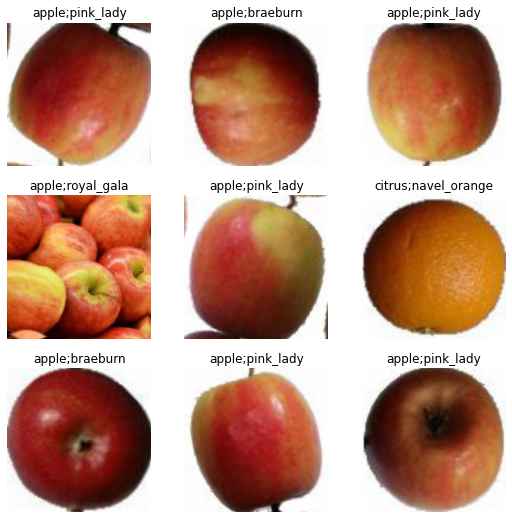

In [9]:
# Preview data
dls.show_batch()

In [10]:
# Init learner; use resnet50 as the starting point for this CNN
learn = cnn_learner(dls, resnet50, metrics=partial(accuracy_multi, thresh=0.5), model_dir='models')

In [11]:
# Calc optimal learning rate
#learn.lr_find()

In [12]:
# Train model
learn.fine_tune(10, 0.001)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.746247,0.413727,0.776515,08:34


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.543598,0.368401,0.815152,10:05
1,0.509131,0.311540,0.875253,10:01
2,0.453548,0.262650,0.931061,09:59
3,0.386487,0.202478,0.974495,10:44
4,0.321141,0.164260,0.990404,11:13
5,0.259181,0.101316,0.994697,11:03
6,0.212050,0.091783,0.994192,11:06
7,0.174007,0.081468,0.994697,11:14
8,0.156825,0.075845,0.993939,10:58
9,0.143089,0.075383,0.994444,10:47


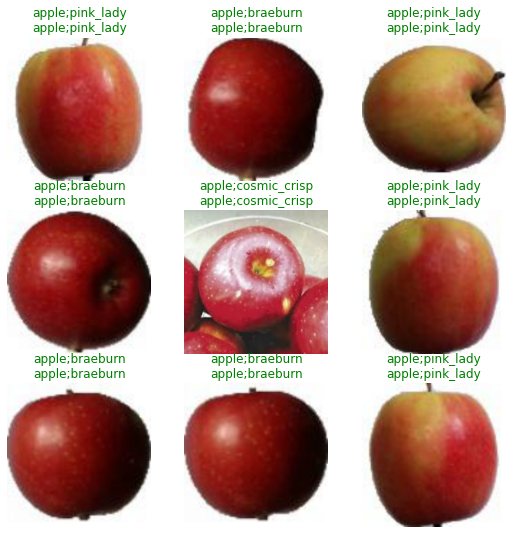

In [13]:
# Preview results
learn.show_results()

,target,predicted,probabilities,loss
0,apple;braeburn,apple;royal_gala,"TensorBase([[9.9922e-01, 8.1477e-02, 2.0638e-03, 4.4253e-01, 1.0728e-01, 1.7736e-01,\n 1.0487e-03, 2.4306e-01, 9.5232e-02, 1.8002e-02, 8.9612e-01, 6.6515e-02],\n [9.9947e-01, 2.8611e-02, 1.8723e-03, 5.7942e-01, 2.0902e-01, 8.8197e-02,\n 4.8724e-04, 1.0117e-01, 2.2560e-02, 4.0547e-02, 5.2000e-01, 1.2087e-01],\n [3.5824e-09, 1.2592e-05, 1.6551e-06, 6.4361e-02, 8.1233e-01, 9.3755e-01,\n 1.7714e-06, 9.9884e-01, 1.0000e+00, 1.4878e-06, 3.6723e-02, 7.2374e-02],\n [9.9955e-01, 7.1729e-02, 4.4736e-04, 2.1337e-01, 8.4476e-02, 6.2225e-02,\n 2.0968e-04, 8.9442e-02, 3.5396e-02, 1.0820e-01, 6.3713e-01, 3.3806e-01],\n [9.9826e-01, 2.0349e-01, 2.8576e-03, 1.7781e-01, 1.2795e-01, 1.2279e-01,\n 1.1188e-03, 1.1130e-01, 6.1401e-02, 6.2396e-01, 1.6094e-01, 1.8683e-01],\n [9.9192e-01, 1.2409e-01, 1.8621e-02, 1.8698e-01, 8.1963e-02, 1.1929e-01,\n 4.5210e-03, 8.9011e-02, 1.0381e-01, 1.9811e-01, 2.5704e-01, 1.5402e-01],\n [2.3157e-09, 9.9176e-06, 2.3408e-07, 7.5323e-03, 4.8129e-02, 9.4398e-01,\n 4.5271e-06, 9.9982e-01, 1.0000e+00, 1.8484e-06, 1.8934e-01, 1.3543e-02],\n [9.9996e-01, 8.3849e-01, 2.0407e-05, 1.0341e-01, 6.8976e-02, 1.3517e-01,\n 1.7661e-04, 5.6664e-02, 1.0094e-01, 1.6009e-04, 9.5409e-01, 2.8022e-02],\n [9.9356e-01, 5.1524e-01, 2.5434e-03, 2.0513e-01, 1.0545e-01, 1.5754e-01,\n 4.2518e-04, 1.2015e-01, 6.4966e-02, 1.0707e-02, 2.4878e-01, 4.2174e-01]])",0.5112043023109436


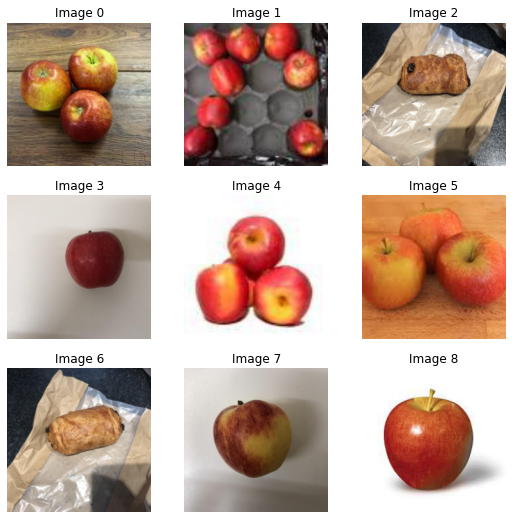

In [14]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9)

In [15]:
learn.save('model1.pkl')

Path('images/models/model1.pkl.pth')

In [16]:
learn.export()

In [17]:
learn.predict('images/12-12-2021_IMG_3855.JPEG')

((#2) ['crossiant_plain','pastery'],
 TensorBase([False, False, False, False, False,  True, False, False,  True, False,
         False, False]),
 TensorBase([3.6288e-09, 2.5878e-06, 1.3071e-07, 6.2384e-03, 8.0182e-03, 9.9986e-01,
         4.3200e-08, 1.9518e-01, 1.0000e+00, 1.0458e-04, 1.4319e-03, 9.1940e-03]))